# DiGraph Overview

https://networkx.org/documentation/stable/reference/algorithms/bipartite.html?highlight=bipartite#module-networkx.algorithms.bipartite

In [42]:
import networkx as nx
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json
#from networkx.algorithms import bipartite
#from networkx.algorithms import digraph
warnings.filterwarnings('ignore')



In [45]:
with open("config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})

In [48]:
DG = nx.DiGraph()

In [49]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

DG.out_degree(1, weight='weight')

0.5

In [50]:
list(DG.successors(1))



[2]

In [51]:
list(DG.neighbors(1))

[2]

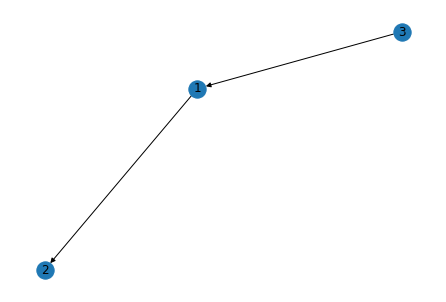

In [52]:
nx.draw(DG, with_labels=True)

# Getting Actual Augur Network Data

In [136]:
contrib_net = pd.DataFrame()

net_query = salc.sql.text(f"""
            SELECT 
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a.login, 
                MAX ( RANK ) AS weight 
            FROM
                explorer_contributor_actions a,
                repo b 
            WHERE
                a.repo_id = b.repo_id --and a.repo_id = 1
            GROUP BY
                a.cntrb_id,
                a.repo_id,
                b.repo_name,
                b.repo_git,
                a."login"
            ORDER BY
                repo_id;  

                """)

network = pd.read_sql(net_query, con=engine)

display(network)

network.dtypes

,cntrb_id,repo_id,repo_name,repo_git,login,weight
0,25537,1,rails,https://github.com/rails/rails.git,jcoyne,49
1,25566,1,rails,https://github.com/rails/rails.git,jeremyf,8
2,25577,1,rails,https://github.com/rails/rails.git,cbeer,1
3,25635,1,rails,https://github.com/rails/rails.git,twalpole,10
4,25952,1,rails,https://github.com/rails/rails.git,nicolasfranck,1
...,...,...,...,...,...,...
22322,25640,26093,xslt,https://github.com/ropensci/xslt,cboettig,1
22323,25678,26093,xslt,https://github.com/ropensci/xslt,jimhester,3
22324,25717,26093,xslt,https://github.com/ropensci/xslt,zkamvar,1
22325,42393,26093,xslt,https://github.com/ropensci/xslt,oggioniale,1


cntrb_id      int64
repo_id       int64
repo_name    object
repo_git     object
login        object
weight        int64
dtype: object

In [137]:
augDG = nx.DiGraph()

In [138]:
noderepo = network['repo_git']
nodecontrb = network['cntrb_id']#.unique()
weight = network['weight']


In [139]:
weighted_edges = (network['cntrb_id'], network['repo_git'], network['weight'])

In [140]:
networker = pd.DataFrame(weighted_edges)
networker = networker.transpose()

In [141]:
print(networker)

      cntrb_id                            repo_git weight
0        25537  https://github.com/rails/rails.git     49
1        25566  https://github.com/rails/rails.git      8
2        25577  https://github.com/rails/rails.git      1
3        25635  https://github.com/rails/rails.git     10
4        25952  https://github.com/rails/rails.git      1
...        ...                                 ...    ...
22322    25640    https://github.com/ropensci/xslt      1
22323    25678    https://github.com/ropensci/xslt      3
22324    25717    https://github.com/ropensci/xslt      1
22325    42393    https://github.com/ropensci/xslt      1
22326    51433    https://github.com/ropensci/xslt      1

[22327 rows x 3 columns]


In [142]:
grapher=nx.from_pandas_edgelist(networker, 'cntrb_id', 'repo_git',edge_attr='weight', create_using=nx.DiGraph)

In [143]:
print(grapher)

DiGraph with 17248 nodes and 22321 edges


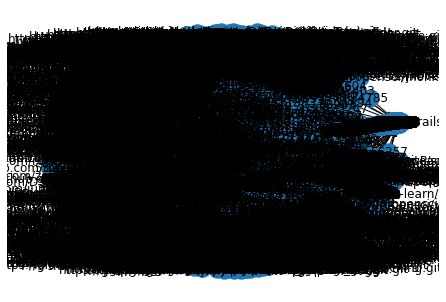

In [144]:
nx.draw(grapher, with_labels=True)

In [133]:
list(grapher.successors(37224))

['https://github.com/rails/rails.git']

In [134]:
list(grapher.neighbors(37224))

['https://github.com/rails/rails.git']

In [145]:
nx.closeness_centrality(grapher)

{25537: 0.0,
 'https://github.com/rails/rails.git': 0.287586246883516,
 25566: 0.0,
 25577: 0.0,
 25635: 0.0,
 25952: 0.0,
 25975: 0.0,
 25977: 0.0,
 25980: 0.0,
 25983: 0.0,
 25986: 0.0,
 25991: 0.0,
 25992: 0.0,
 25993: 0.0,
 25994: 0.0,
 25997: 0.0,
 26010: 0.0,
 26011: 0.0,
 26014: 0.0,
 26016: 0.0,
 26017: 0.0,
 26019: 0.0,
 26020: 0.0,
 26021: 0.0,
 26024: 0.0,
 26025: 0.0,
 26027: 0.0,
 26028: 0.0,
 26031: 0.0,
 26033: 0.0,
 26035: 0.0,
 26036: 0.0,
 26037: 0.0,
 26041: 0.0,
 26042: 0.0,
 26046: 0.0,
 26047: 0.0,
 26048: 0.0,
 26049: 0.0,
 26051: 0.0,
 26052: 0.0,
 26053: 0.0,
 26057: 0.0,
 26060: 0.0,
 26062: 0.0,
 26063: 0.0,
 26065: 0.0,
 26068: 0.0,
 26072: 0.0,
 26073: 0.0,
 26074: 0.0,
 26080: 0.0,
 26083: 0.0,
 26085: 0.0,
 26094: 0.0,
 26095: 0.0,
 26097: 0.0,
 26098: 0.0,
 26100: 0.0,
 26103: 0.0,
 26105: 0.0,
 26108: 0.0,
 26109: 0.0,
 26110: 0.0,
 26111: 0.0,
 26113: 0.0,
 26114: 0.0,
 26117: 0.0,
 26123: 0.0,
 26125: 0.0,
 26126: 0.0,
 26129: 0.0,
 26130: 0.0,
 26131

In [146]:
#augDG.add_weighted_edges_from(grapher)

In [58]:
print(weighted_edges)

(0        25537
1        25566
2        25577
3        25635
4        25952
         ...  
22322    25640
22323    25678
22324    25717
22325    42393
22326    51433
Name: cntrb_id, Length: 22327, dtype: int64, 0        https://github.com/rails/rails.git
1        https://github.com/rails/rails.git
2        https://github.com/rails/rails.git
3        https://github.com/rails/rails.git
4        https://github.com/rails/rails.git
                        ...                
22322      https://github.com/ropensci/xslt
22323      https://github.com/ropensci/xslt
22324      https://github.com/ropensci/xslt
22325      https://github.com/ropensci/xslt
22326      https://github.com/ropensci/xslt
Name: repo_git, Length: 22327, dtype: object, 0        49
1         8
2         1
3        10
4         1
         ..
22322     1
22323     3
22324     1
22325     1
22326     1
Name: weight, Length: 22327, dtype: int64)


In [57]:
augDG.add_weighted_edges_from(weighted_edges)

ValueError: too many values to unpack (expected 3)